**Title: Machine Learning Model for Predicting class of Proteins**

**Import Dependencies :** Import the necessary libraries such as pandas, numpy, matplotlib, seaborn ,scikit-learn, etc.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

sns.set_style('whitegrid')
%matplotlib inline

In [48]:
import os
os.listdir('../')

['.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 '.venv',
 '.vscode',
 'constant.py',
 'data',
 'flask_server.py',
 'models',
 'poc.py',
 'text.py',
 'text.txt',
 'training',
 'uploads',
 '__pycache__']

**Data Loading:** Load the data into dataframe for data manipulation, cleansing and analysis.

In [49]:
df1 = pd.read_csv(r'../data/pdb_data_no_dups.csv')
df2 = pd.read_csv(r'../data/pdb_data_seq.csv')
df = pd.merge(df1,df2[['structureId','chainId','sequence']], on='structureId', how='inner')
df

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG
3,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471144,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...
471145,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...
471146,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...
471147,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...


**Data Exploration:** Exploring data to get valuable insights.

*Total number of protein classes*

In [50]:
df = df[df['macromoleculeType'] == "Protein"]
print(df.shape)
len(df[df['macromoleculeType'] == "Protein"]['classification'].value_counts())
df.reset_index(drop=True)

(346325, 16)


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
0,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
3,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
4,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346320,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...
346321,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...
346322,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...
346323,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...


*Missing values per column in percentage*

In [51]:

for i, v in df.isnull().sum().items():
    print(i, " : ", round((v/471149)*100, 1))

structureId  :  0.0
classification  :  0.0
experimentalTechnique  :  0.0
macromoleculeType  :  0.0
residueCount  :  0.0
resolution  :  3.4
structureMolecularWeight  :  0.0
crystallizationMethod  :  22.4
crystallizationTempK  :  21.7
densityMatthews  :  8.2
densityPercentSol  :  8.2
pdbxDetails  :  11.0
phValue  :  18.5
publicationYear  :  10.8
chainId  :  0.0
sequence  :  0.0


**Data Visualization:** Creating graphs and plots in order to get the information about data distribution and arrangements

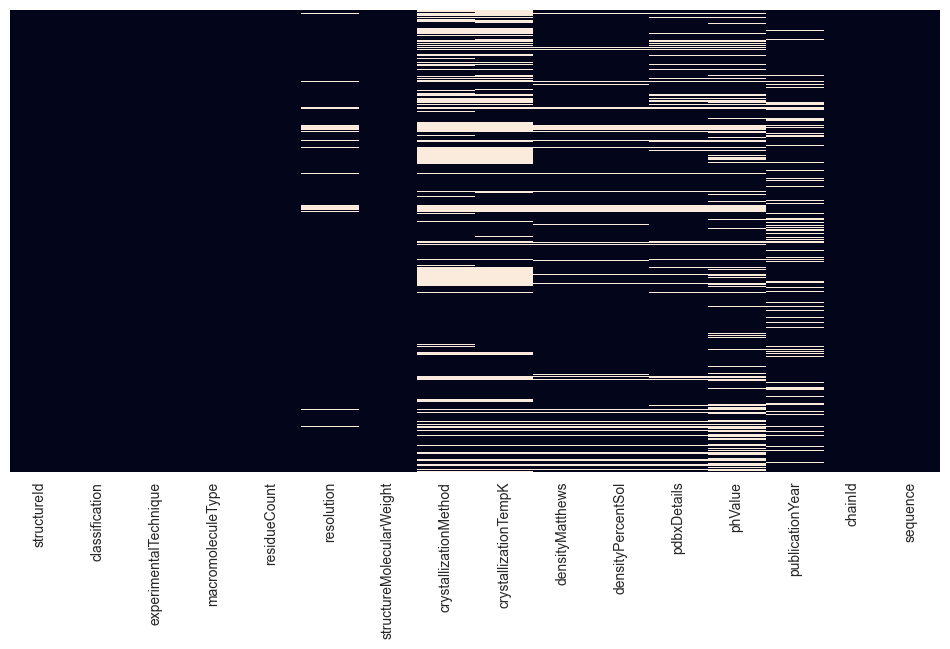

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)
plt.show()

**Data Cleansing:** Cleansed the target variable before passing it to machine learning model as training set.

In [52]:
df['classification'] = df['classification'].astype('str')
df = df[df['macromoleculeType'] == "Protein"]
df.reset_index(inplace=True, drop=True)

df['classification'] = df['classification'].str.lower()
df['classification'] = df['classification'].str.replace('(', '/')
df['classification'] = df['classification'].str.replace(',', '/')
df['classification'] = df['classification'].str.replace(', ', '/')
df['classification'] = df['classification'].str.replace('/ ', '/')
df['classification'] = df['classification'].str.replace(')', '')
# pattern = '|'.join([', ', ',', '('])
# df['classification'] = df['classification'].str.replace(pattern, '/')

# Maintaing class ordering. There are the same classes with different order 
#ex. viral protein/immune system and immune system/viral protein
df['classification'] = df['classification'].apply(lambda x:"/".join(sorted(x.split('/'))))

df.head()

C:\Users\vishwas.katiyar\AppData\Local\Temp\ipykernel_16548\36982433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification'] = df['classification'].astype('str')


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
0,101M,oxygen transport,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1,102L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2,102M,oxygen transport,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
3,103L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
4,103M,oxygen transport,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


Deleting outliar 23 values for <b>Molecular weight</b> which was for Virus classification. It was a very small number so was deleted.

<b> Note: </b> Molecular weight is calculated using sequence using the weight of each amino acid. Thus, if sequence is long, then it can have large weight


**Data Visualization:** Various kind of plots and graphs are created to find out the relationship between different feature and how scatter the data points are. Multiple plots are created to analyse the data distributions.

<AxesSubplot:xlabel='structureMolecularWeight', ylabel='densityMatthews'>

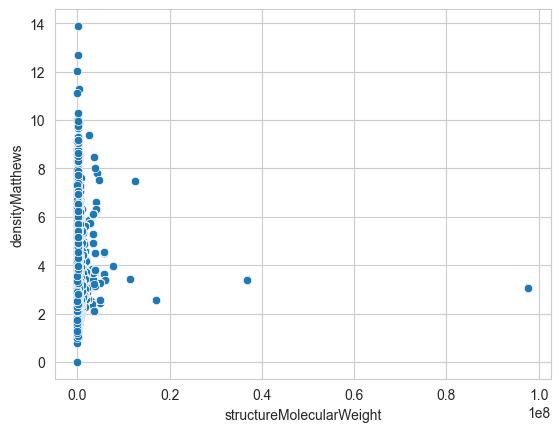

In [8]:
sns.scatterplot(x="structureMolecularWeight", y="densityMatthews", data=df)

# Later check: You can compare weight with sequence length

<AxesSubplot:xlabel='structureMolecularWeight', ylabel='densityMatthews'>

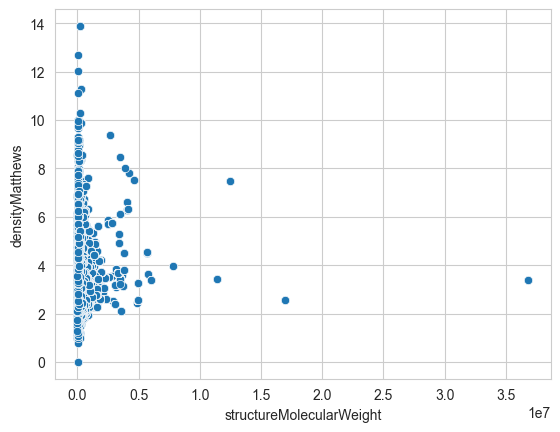

In [9]:
#density_weight = df[['classification','densityMatthews','structureMolecularWeight']].dropna().copy()
weight_max = df['structureMolecularWeight'] == df['structureMolecularWeight'].max()
df = df[~weight_max].copy()
sns.scatterplot(x="structureMolecularWeight", y="densityMatthews", data=df)

Dealing with outliar of phValue. 

<AxesSubplot:>

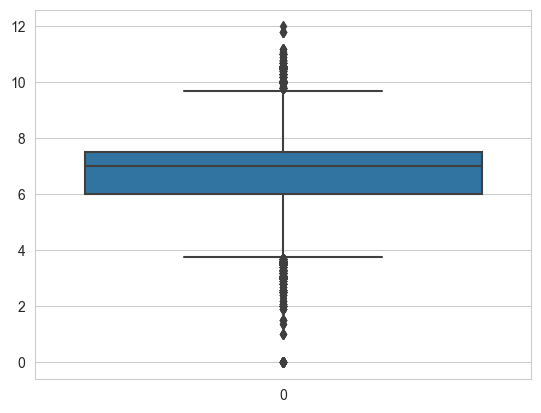

In [53]:
df['phValue'] = df['phValue'].replace(100, np.nan)
sns.boxplot(df['phValue'].dropna())

In [54]:
df.phValue.isnull().sum()

87203

In [55]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'chainId', 'sequence'],
      dtype='object')

In [46]:
import pandas as pd

# Assuming df is your DataFrame

# Create an empty list to store the profiling results
profile_data = []

# Loop through each column in the DataFrame
for col in df.columns:
    data_type = df[col].dtype  # Get data type
    unique_values = df[col].unique()  # Get unique values
    num_unique_values = len(unique_values)  # Get number of unique values
    num_missing_values = df[col].isnull().sum()  # Get number of missing values
    
    # Calculate statistics for numeric data types
    if pd.api.types.is_numeric_dtype(df[col]):
        min_value = df[col].min()
        max_value = df[col].max()
        average_value = df[col].mean()
        median_value = df[col].median()
        std_deviation = df[col].std()
        data_length = None
    # Calculate data length for string data types
    elif pd.api.types.is_string_dtype(df[col]):
        min_value = None
        max_value = None
        average_value = None
        median_value = None
        std_deviation = None
        data_length = df[col].apply(len).mean()
    else:
        min_value = None
        max_value = None
        average_value = None
        median_value = None
        std_deviation = None
        data_length = None
    
    # Append the results to the profile data list
    profile_data.append({'Column Name': col, 'Data Type': data_type, 'Unique Values': unique_values, 
                         'Number of Unique Values': num_unique_values, 
                         'Number of Missing Values': num_missing_values, 'Min Value': min_value, 
                         'Max Value': max_value, 'Average Value': average_value, 
                         'Median Value': median_value, 'Standard Deviation': std_deviation, 
                         'Data Length': data_length})

# Create a DataFrame from the profile data
profile_df = pd.DataFrame(profile_data)

# Display the profile DataFrame
profile_df.fillna('')


,Column Name,Data Type,Unique Values,Number of Unique Values,Number of Missing Values,Min Value,Max Value,Average Value,Median Value,Standard Deviation,Data Length
0,structureId,object,127387,127387,0,,,,,,4.0
1,classification,object,3018,3018,0,,,,,,15.429718
2,experimentalTechnique,object,29,29,0,,,,,,16.964424
3,macromoleculeType,object,1,1,0,,,,,,7.0
4,residueCount,int64,3780,3780,0,3.0,313236.0,4708.536765,856.0,26484.160063,
5,resolution,float64,597,597,16093,0.48,70.0,2.716206,2.3,3.083736,
6,structureMolecularWeight,float64,118622,118622,0,453.55,97730536.0,551691.759876,97032.76,3129939.885638,
7,crystallizationMethod,object,527,527,105728,,,,,,
8,crystallizationTempK,float64,174,174,102391,4.0,398.0,291.243141,293.0,8.498793,
9,densityMatthews,float64,662,662,38844,0.0,13.89,2.760855,2.57,0.738698,


Dropped the features from the dataset, to prepare the training set. These dropped features are irrelevant to the target label 'Classification'

In [56]:
df.drop(['crystallizationMethod','crystallizationTempK', 'publicationYear', 'pdbxDetails'], axis=1, inplace=True) 
df.dropna(subset=['densityMatthews','densityPercentSol','resolution', 'sequence'], inplace=True)

Filter dataset's records for classification types which are > 100

In [57]:
counts = df['classification'].value_counts()

types = np.asarray(counts[(counts > 100)].index)

data = df[df.classification.isin(types)].copy()
data.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,chainId,sequence
0,101M,oxygen transport,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,3.09,60.20,9.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1,102L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,Protein,165,1.74,18926.61,2.75,55.28,NaN,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2,102M,oxygen transport,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,3.09,60.20,9.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [58]:
counts

classification
hydrolase                             43121
transferase                           34918
oxidoreductase                        33143
immune system                         15170
hydrolase/hydrolase inhibitor         13382
                                      ...  
receptor/transcription regulation         1
cellulosome                               1
siganling protein/transferase             1
complex /cys/hydrolase /o-glycosyl        1
electron transport/iron                   1
Name: count, Length: 2647, dtype: int64

In [59]:
data.phValue.isnull().sum()

45033

Handling Outliar of PhValue

In [60]:
class_dict = dict()
count = 0

classes = data['classification'].value_counts().items()

for cat, num in classes:
    
    # Remove all other classes that have number of values are less than 100
    if num < 100:
        temp = data['classification'] == cat
        data = data[~temp].copy()
        continue
        
    # Remove all a class if all phValues are null
    if data[(data['classification'] == cat) & (data['phValue'].notnull())].phValue.count() == 0:
        temp = data['classification'] == cat
        data = data[~temp].copy()
        continue
    
    ph_mean = round(data[data['classification'] == cat]['phValue'].dropna().mean(),2)
    data.loc[(data['classification'] == cat) & (data['phValue'].isna()),'phValue'] = ph_mean
    
    
    
    if num >= 100:
        class_dict[cat] = count
        count += 1

class_dict

{'hydrolase': 0,
 'transferase': 1,
 'oxidoreductase': 2,
 'immune system': 3,
 'hydrolase/hydrolase inhibitor': 4,
 'lyase': 5,
 'transcription': 6,
 'transport protein': 7,
 'viral protein': 8,
 'isomerase': 9,
 'signaling protein': 10,
 'ligase': 11,
 'structural genomics/unknown function': 12,
 'transferase/transferase inhibitor': 13,
 'protein binding': 14,
 'membrane protein': 15,
 'sugar binding protein': 16,
 'chaperone': 17,
 'structural protein': 18,
 'dna binding protein': 19,
 'cell adhesion': 20,
 'electron transport': 21,
 'metal binding protein': 22,
 'unknown function': 23,
 'cell cycle': 24,
 'toxin': 25,
 'protein transport': 26,
 'photosynthesis': 27,
 'oxidoreductase/oxidoreductase inhibitor': 28,
 'rna binding protein': 29,
 'immune system/viral protein': 30,
 'de novo protein': 31,
 'gene regulation': 32,
 'hormone': 33,
 'virus': 34,
 'apoptosis': 35,
 'metal transport': 36,
 'fluorescent protein': 37,
 'transcription regulator': 38,
 'biosynthetic protein': 39,


In [61]:
data['class'] = data['classification'].map(class_dict)
data.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,chainId,sequence,class
0,101M,oxygen transport,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,3.09,60.2,9.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,40
2,102M,oxygen transport,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,3.09,60.2,9.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,40
4,103M,oxygen transport,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,3.09,60.3,9.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,40
7,104M,oxygen transport,X-RAY DIFFRACTION,Protein,153,1.71,18030.63,1.87,34.3,7.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,40
8,105M,oxygen transport,X-RAY DIFFRACTION,Protein,153,2.02,18030.63,1.83,33.0,9.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,40


Data Exploration post cleansing activities performed, Discarded all Null or NaN values available in the dataset.

In [62]:
data.isnull().sum()

structureId                 0
classification              0
experimentalTechnique       0
macromoleculeType           0
residueCount                0
resolution                  0
structureMolecularWeight    0
densityMatthews             0
densityPercentSol           0
phValue                     0
chainId                     0
sequence                    0
class                       0
dtype: int64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281346 entries, 0 to 346324
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               281346 non-null  object 
 1   classification            281346 non-null  object 
 2   experimentalTechnique     281346 non-null  object 
 3   macromoleculeType         281346 non-null  object 
 4   residueCount              281346 non-null  int64  
 5   resolution                281346 non-null  float64
 6   structureMolecularWeight  281346 non-null  float64
 7   densityMatthews           281346 non-null  float64
 8   densityPercentSol         281346 non-null  float64
 9   phValue                   281346 non-null  float64
 10  chainId                   281346 non-null  object 
 11  sequence                  281346 non-null  object 
 12  class                     281346 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 

**Summary Statistics of dataset**

In [32]:
data.describe()

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,class
count,281346.000000,281346.000000,2.813460e+05,281346.000000,281346.000000,281346.000000,281346.000000
mean,1691.697493,2.302865,2.029507e+05,2.756517,52.781378,6.800873,14.499406
std,2855.224154,0.649357,9.794198e+05,0.732800,10.088332,1.240838,23.883095
min,4.000000,0.480000,4.685500e+02,0.000000,0.000000,0.000000,0.000000
25%,424.000000,1.900000,4.789956e+04,2.280000,45.820000,6.300000,1.000000
50%,844.000000,2.200000,9.568578e+04,2.560000,51.920000,6.830000,5.000000
75%,1760.000000,2.680000,1.978450e+05,3.020000,59.300000,7.500000,17.000000
max,57792.000000,9.100000,9.773054e+07,13.890000,90.330000,100.000000,145.000000


**Exploratory Data Analysis**

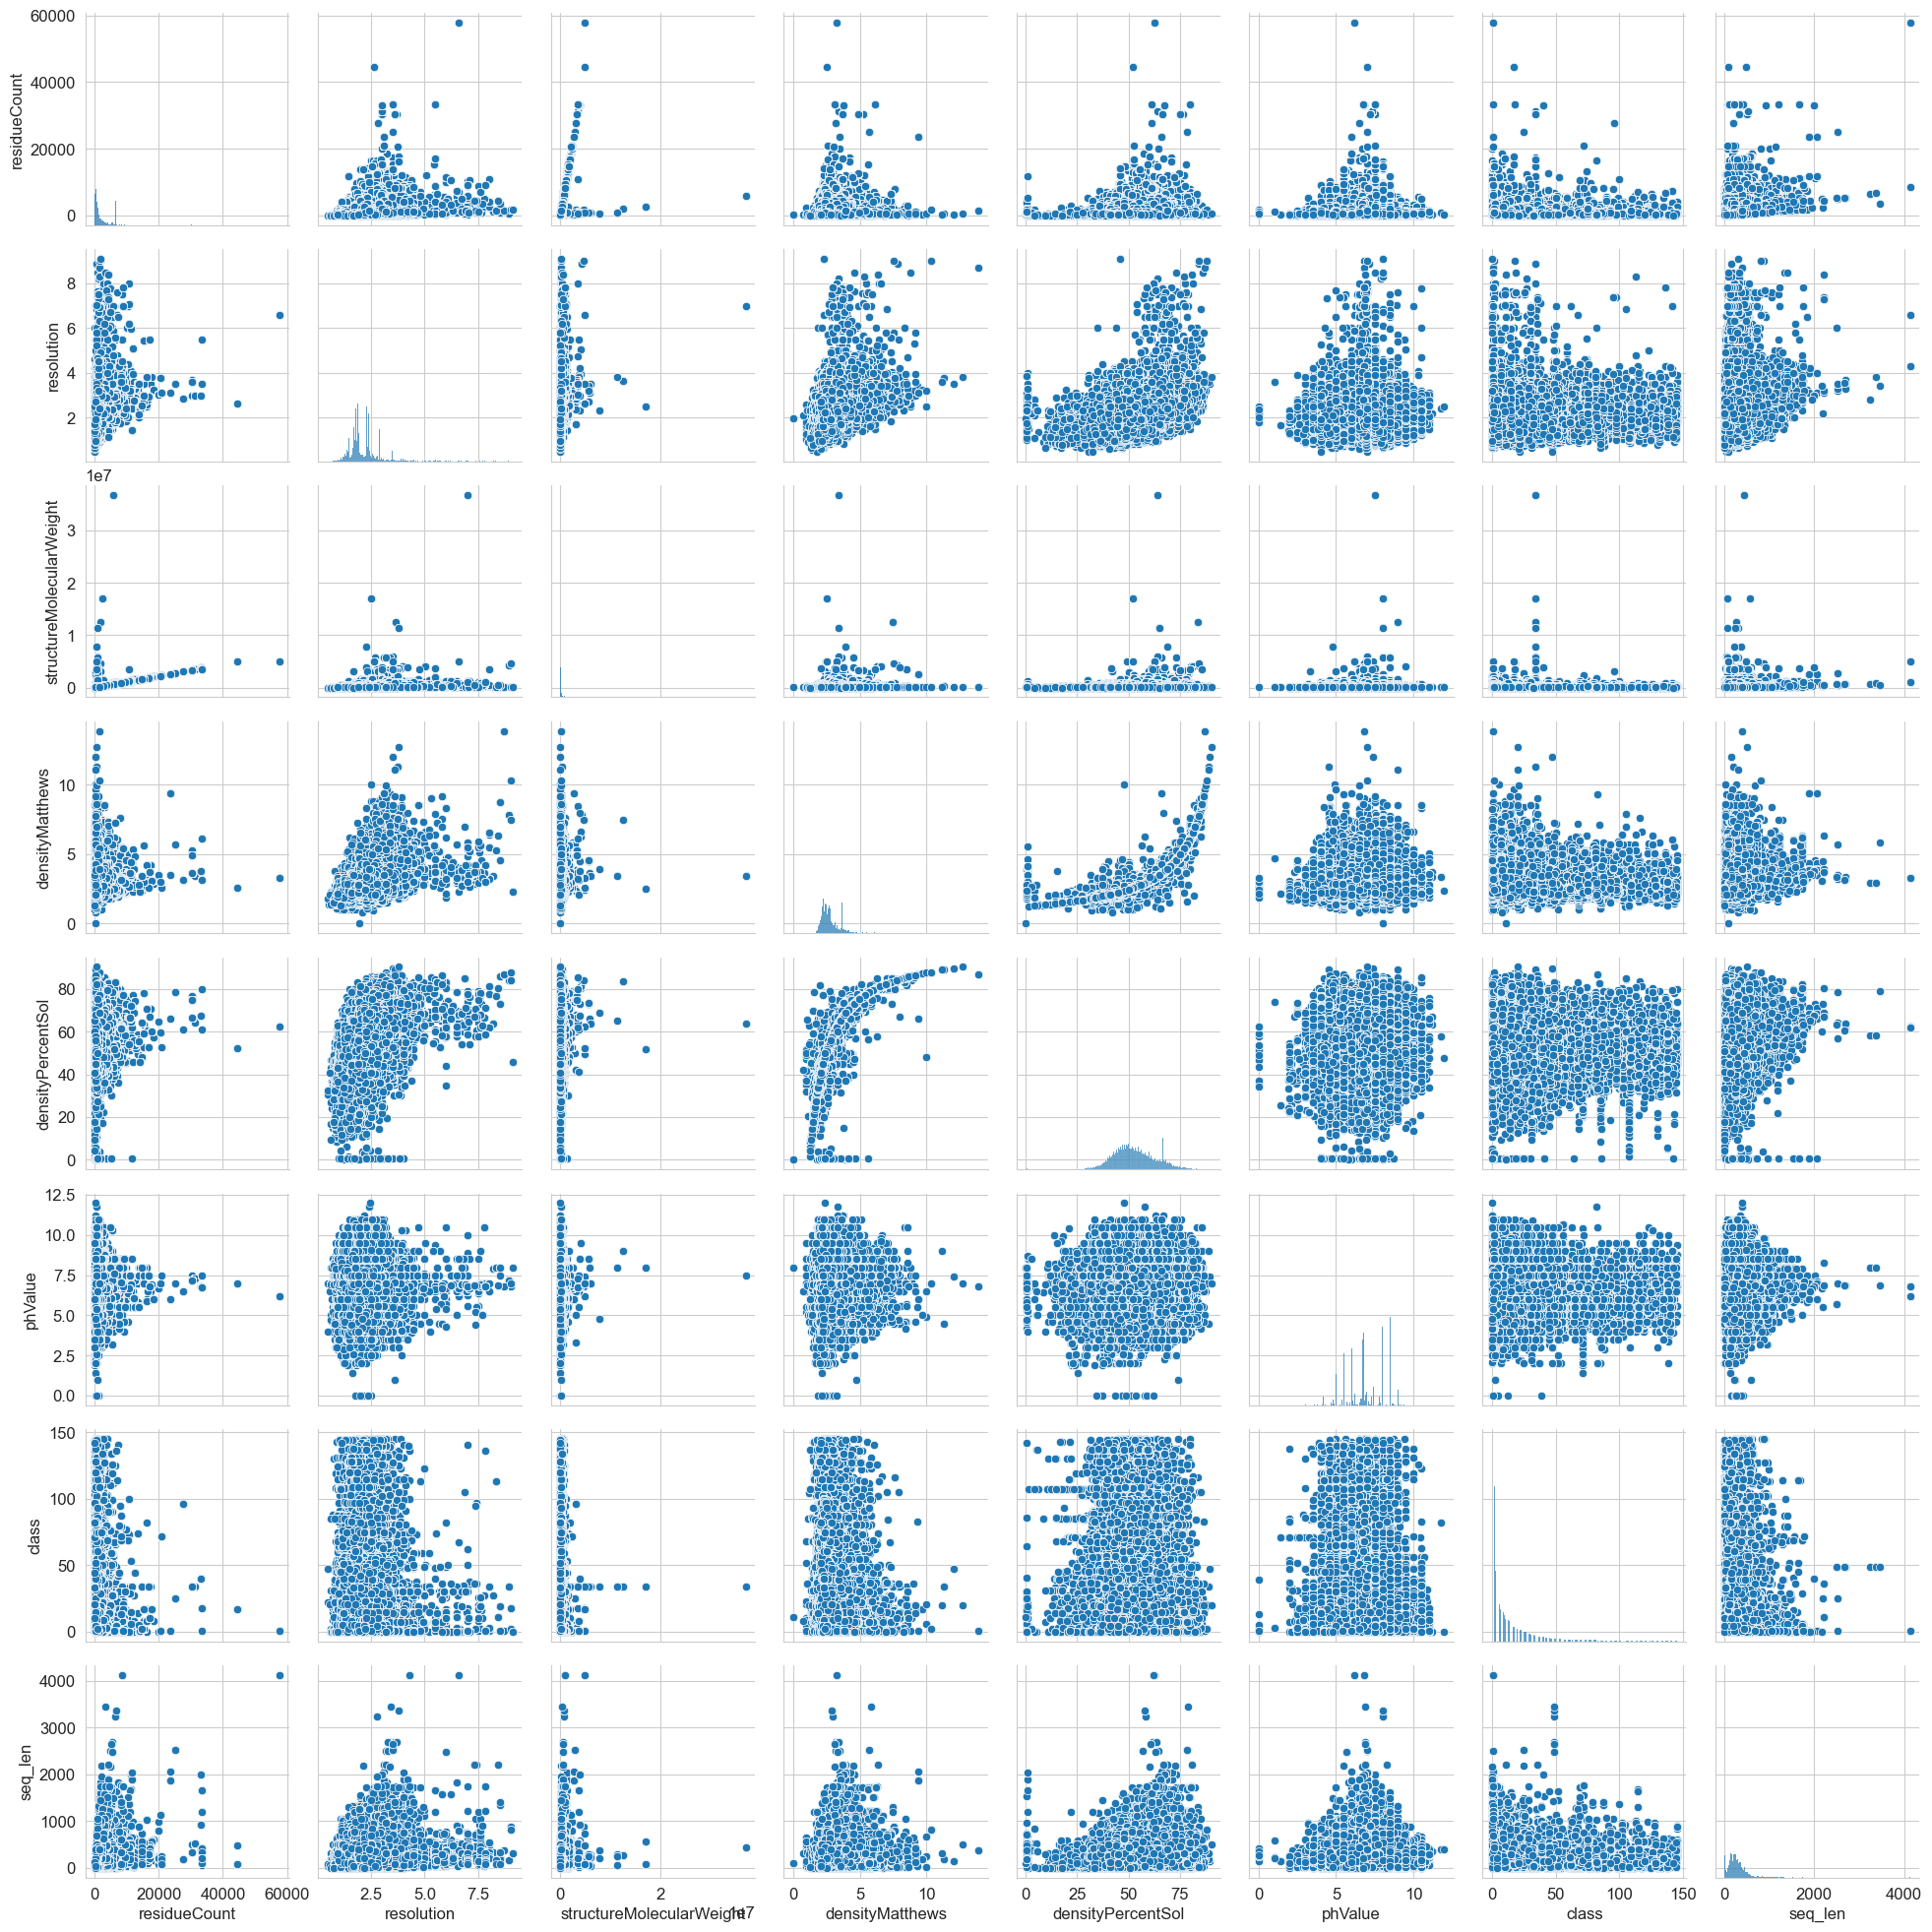

In [55]:
plt.rcParams['font.size'] = 12
sns.pairplot(data)
plt.savefig('FeaturesExploratoryDataAnalysis.png')


**Data Encoding:** As per the PHValue, Encoded the PHValue level to Basic, Acidic and Neural in order to create Count plot to find their frequency into the dataset.

In [64]:
def set_phlevel(x):
    if x > 7:
        return 'Basic'
    elif x < 7:
        return 'Acidic'
    else:
        return 'Neutral'

data['ph_level'] = data['phValue'].apply(set_phlevel)
ph_level = data.groupby('ph_level')['ph_level'].count()
ph_level

ph_level
Acidic     156069
Basic       99697
Neutral     25580
Name: ph_level, dtype: int64

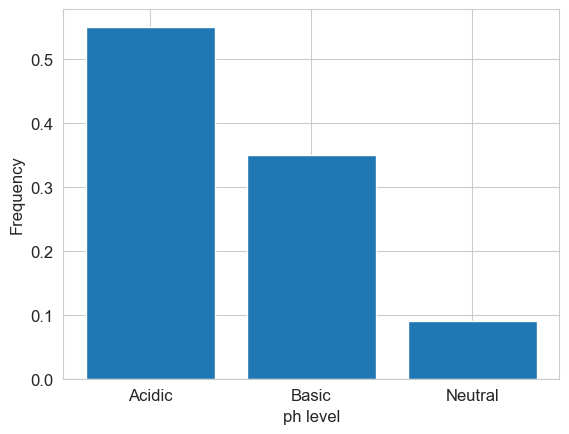

In [23]:
labels = ph_level.index.tolist()
# sizes = np.round((ph_level.values) * 100 / sum(ph_level.values), 2).tolist()
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# ax1.axis('equal')  
# plt.tight_layout()
# plt.show()

sizes = np.round((ph_level.values) / sum(ph_level.values), 2).tolist()
plt.bar(x=labels, height=sizes)
plt.xlabel('ph level')
plt.ylabel('Frequency');

In [65]:
data['seq_len'] = data['sequence'].apply(lambda x: len(x))
data.head()
data.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'densityMatthews', 'densityPercentSol',
       'phValue', 'chainId', 'sequence', 'class', 'ph_level', 'seq_len'],
      dtype='object')

<AxesSubplot:xlabel='densityMatthews', ylabel='densityPercentSol'>

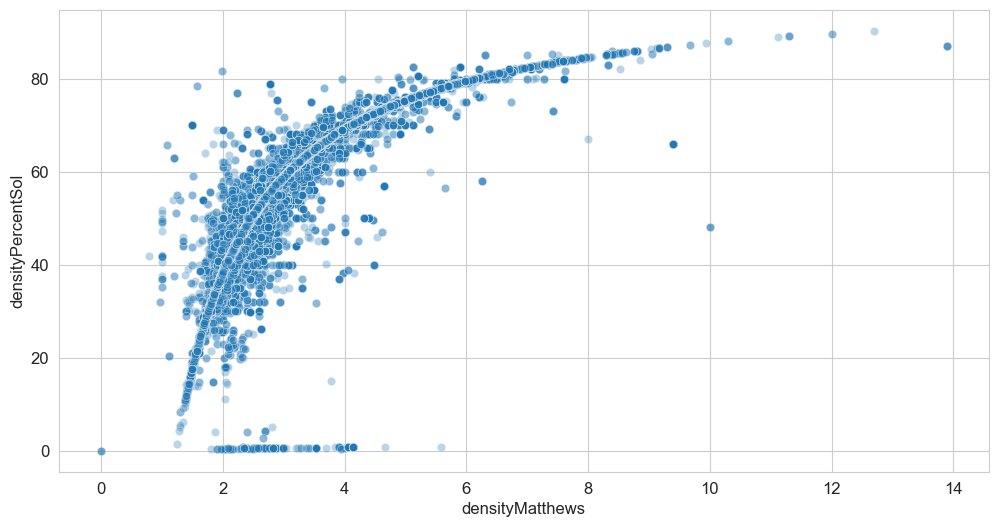

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='densityMatthews', y='densityPercentSol', data=data, alpha=0.3)

## Building a train-test split model

In [66]:
X = data[['residueCount','resolution','structureMolecularWeight','densityMatthews','densityPercentSol','phValue']]
y = data['class']

scaler = StandardScaler().fit(X)
X_norm =  scaler.transform(X)
X_scaled = pd.DataFrame(X_norm, columns=X.columns)
X_scaled.shape


(281346, 6)

In [67]:
X

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue
0,154,2.07,18112.80,3.09,60.20,9.0
2,154,1.84,18010.64,3.09,60.20,9.0
4,154,2.07,18093.78,3.09,60.30,9.0
7,153,1.71,18030.63,1.87,34.30,7.0
8,153,2.02,18030.63,1.83,33.00,9.0
...,...,...,...,...,...,...
346320,388,1.90,43542.29,2.79,55.93,7.0
346321,1572,2.40,174722.12,3.96,68.92,7.0
346322,1572,2.40,174722.12,3.96,68.92,7.0
346323,1572,2.40,174722.12,3.96,68.92,7.0


In [68]:
y

0          40
2          40
4          40
7          40
8          40
         ... 
346320    109
346321    109
346322    109
346323    109
346324    109
Name: class, Length: 281346, dtype: int64

In [69]:
X.reset_index(drop=True)

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue
0,154,2.07,18112.80,3.09,60.20,9.0
1,154,1.84,18010.64,3.09,60.20,9.0
2,154,2.07,18093.78,3.09,60.30,9.0
3,153,1.71,18030.63,1.87,34.30,7.0
4,153,2.02,18030.63,1.83,33.00,9.0
...,...,...,...,...,...,...
281341,388,1.90,43542.29,2.79,55.93,7.0
281342,1572,2.40,174722.12,3.96,68.92,7.0
281343,1572,2.40,174722.12,3.96,68.92,7.0
281344,1572,2.40,174722.12,3.96,68.92,7.0


In [29]:
X.to_csv('X.csv',index=False)

In [70]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler().fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_scaled.head()


,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue
0,-0.382991,-0.896897,-0.136040,-0.445864,-0.339097,0.151994
1,-0.437785,-0.496497,-0.153078,-0.896729,-1.129270,1.496283
2,-0.353486,-0.943097,-0.126076,-0.213600,-0.008949,-0.700268
3,-0.106211,1.382302,-0.044723,1.166321,1.307676,-0.260958
4,0.336707,1.074302,0.094907,0.852082,1.112363,0.055345


In [72]:
X_test_norm = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_norm, columns=X.columns)
X_test_scaled.head()

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue
0,-0.323631,-0.311697,-0.117174,-0.404876,-0.273662,0.617662
1,-0.505224,-1.235697,-0.175183,-1.197306,-1.803446,-0.014944
2,0.491606,0.150303,0.151402,0.100639,0.366804,1.496283
3,-0.130095,0.612302,-0.058665,1.726487,1.649721,-0.260958
4,-0.098483,0.150303,-0.048398,-0.350226,-0.285560,-0.436682


### Random Forest Classifier

In [73]:
#Random Forest with singal train-test split
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, n_jobs=-1)
m.fit(X_train, y_train)

predictions = m.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.77      0.92      0.84      8636
           1       0.79      0.90      0.84      6889
           2       0.91      0.92      0.91      6764
           3       0.88      0.96      0.92      2988
           4       0.95      0.92      0.93      2672
           5       0.94      0.86      0.90      2334
           6       0.84      0.89      0.86      1607
           7       0.88      0.83      0.85      1346
           8       0.93      0.91      0.92      1286
           9       0.94      0.77      0.85      1216
          10       0.88      0.82      0.85      1106
          11       0.92      0.76      0.83       897
          12       0.89      0.74      0.81       977
          13       0.85      0.74      0.79       933
          14       0.89      0.84      0.86       871
          15       0.92      0.86      0.89       698
          16       0.92      0.80      0.85       681
          17       0.91    

In [74]:
print(m)

RandomForestClassifier(min_samples_leaf=3, n_estimators=40, n_jobs=-1)


In [35]:
print("Accuracy :",accuracy_score(y_test, predictions),'\n')

Accuracy : 0.870256820403448 



In [36]:
X_test

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue
99392,828,3.10,93857.62,3.45,64.30,6.50
242381,1976,2.05,230038.02,2.96,58.38,6.00
218256,678,1.64,74968.39,2.73,55.01,6.00
236439,540,1.65,58798.32,2.42,49.18,6.50
84933,690,2.80,78166.20,2.91,57.66,6.79
...,...,...,...,...,...,...
70344,1062,2.15,116621.99,3.00,59.30,6.80
77408,277,1.60,31178.66,2.17,43.37,7.50
293220,479,1.87,56889.59,2.13,42.16,7.50
229555,3952,2.31,433803.69,2.15,42.66,6.40


In [37]:
y_test

99392     17
242381     2
218256     2
236439     2
84933      2
          ..
70344     41
77408     91
293220     2
229555    93
339519    18
Name: class, Length: 56265, dtype: int64

[[7915  259  106 ...    0    0    0]
 [ 284 6230   97 ...    0    0    0]
 [ 227  136 6192 ...    0    1    0]
 ...
 [   0    0    0 ...   20    0    0]
 [   4    2    0 ...    0   12    0]
 [   1    1    2 ...    0    0   15]]


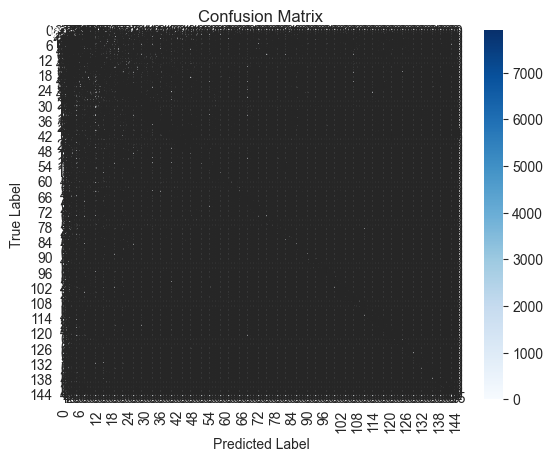

In [82]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
# Replace y_true and y_pred with your actual data

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
X_test.iloc[[0]]

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue
99392,828,3.1,93857.62,3.45,64.3,6.5


In [39]:
 predictions = m.predict(X_test.iloc[[0]])

In [40]:
predictions

array([17], dtype=int64)

In [ ]:
import pickle

# Save the model
with open("RandomFC.pkl", "wb") as f:
    pickle.dump(m, f)


In [ ]:
from joblib import load

# Replace "model.joblib" with the actual filename of your saved model
loaded_model = load("..\models\model.joblib")

In [ ]:
xdf=pd.read_csv('..\data\X.csv')
ydf=pd.read_csv('..\data\y.csv')

xdf,ydf

In [ ]:
loaded_model.predict(xdf.iloc[[4]])

### Decision Tree

In [41]:
# Decision tree with singal train-test split
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8604
           1       0.91      0.89      0.90      6964
           2       0.93      0.92      0.92      6676
           3       0.94      0.96      0.95      2969
           4       0.94      0.95      0.95      2700
           5       0.90      0.90      0.90      2309
           6       0.86      0.89      0.87      1598
           7       0.89      0.87      0.88      1397
           8       0.93      0.93      0.93      1282
           9       0.87      0.88      0.87      1237
          10       0.80      0.87      0.83      1082
          11       0.87      0.86      0.87       901
          12       0.80      0.83      0.82       935
          13       0.83      0.82      0.82       903
          14       0.85      0.87      0.86       841
          15       0.87      0.87      0.87       699
          16       0.86      0.87      0.86       675
          17       0.88    

In [42]:
print("Accuracy :",accuracy_score(y_test, predictions),'\n')

Accuracy : 0.8933439971563139 



In [ ]:
import pickle

# Save the model
with open("DecisionTC.pkl", "wb") as f:
    pickle.dump(dtree, f)


In [ ]:
import joblib
joblib.dump(dtree, 'dtree.joblib', compress='lzma')  # Save only best estimator and compress

print("Model saved efficiently!")

In [83]:
m.classes_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145], dtype=int64)